In [312]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [313]:
#Create a path to where your data is stored.
path = 'C:/Users/kaan/ML'

In [314]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataset_scaled.pkl'))

In [315]:
df.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [316]:
#Reduce to just the mean temperatures
df_mean = df[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [317]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df_mean.drop(['DATE','MONTH'], axis=1)

In [318]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

In [477]:
#Reduce your dataset to a single year
df_mean['YEAR'] = df_mean['DATE'].astype(str).str[:4].astype(int)
dfyear = df_mean[df_mean['YEAR'] == 1993]
dfyear

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,...,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean,YEAR
12054,19930101,1,-2.199044,-2.117743,-2.110816,-2.202890,-1.976118,-1.861151,-1.224630,-2.309284,...,-2.287530,-1.662235,-1.987473,-0.599160,-1.684567,-1.747716,-0.838933,-2.202587,-0.698257,1993
12055,19930102,1,-2.592883,-2.129093,-2.240213,-2.187068,-2.300104,-2.372685,-1.958424,-2.796580,...,-2.242520,-1.716151,-2.465033,-0.562755,-2.694860,-2.786098,-1.187269,-2.406526,-0.157498,1993
12056,19930103,1,-2.674367,-2.151791,-1.934365,-2.804135,-2.830262,-2.500568,-2.272906,-2.929478,...,-2.617597,-1.770068,-2.289090,-0.684104,-2.678022,-2.508221,-1.436081,-2.673216,-0.247625,1993
12057,19930104,1,-2.484237,-2.117743,-1.863784,-2.361113,-2.300104,-2.308743,-1.626469,-2.693214,...,-2.347542,-2.026170,-2.389629,-1.036014,-2.661183,-2.010968,-1.237032,-2.343776,-0.337751,1993
12058,19930105,1,-1.900269,-2.253933,-1.981418,-1.332668,-1.416506,-2.219225,-0.752906,-1.821989,...,-1.132295,-1.338737,-1.937203,-0.963205,-1.751920,-1.382089,-0.950898,-1.355455,-0.728299,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12414,19931227,12,-1.357043,-1.164415,-1.016819,-1.190268,-1.313420,-0.978754,-1.678883,-1.290393,...,-1.177304,-0.920885,-1.283700,-2.091747,-1.718244,-2.157219,-1.249472,-1.888835,-1.239016,1993
12415,19931228,12,-1.438527,-1.277907,-1.240324,-1.285201,-1.210333,-0.940389,-1.154745,-1.290393,...,-1.147298,-1.042197,-1.472210,-1.849050,-1.920302,-1.689216,-1.336556,-1.669208,-1.239016,1993
12416,19931229,12,-1.112591,-1.357351,-1.134453,-0.731423,-0.783261,-0.953178,-0.770377,-1.054129,...,-0.727212,-1.069155,-1.032352,-1.242307,-1.751920,-1.265088,-0.789171,-0.790700,-1.058763,1993
12417,19931230,12,-0.324913,-1.334652,-1.346195,-0.509912,-0.253102,-0.965966,-0.700492,-0.433935,...,-0.292124,-0.907406,-0.316012,-0.720508,-1.852949,-0.723959,-0.764290,-0.320071,-1.118847,1993


In [478]:
dfyear.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,...,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean,YEAR
count,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,1.993067e+07,6.526027,-0.016018,-0.039855,-0.040940,-0.058003,-0.078965,-0.036515,-0.061953,-0.044381,...,-0.039662,-0.118011,-0.006648,-0.058843,0.005113,0.008858,-0.032783,-0.084757,0.009339,1993.0
std,3.454755e+02,3.452584,0.978492,1.103338,1.055315,0.958375,0.982414,0.938211,0.902408,1.099245,...,0.988878,1.003684,0.980386,0.863450,1.211382,0.998548,0.841575,0.968728,0.945095,0.0
min,1.993010e+07,1.000000,-2.674367,-2.492265,-2.240213,-2.804135,-2.830262,-2.500568,-2.307849,-2.929478,...,-2.617597,-2.066608,-2.465033,-2.346579,-2.694860,-3.239476,-1.796858,-2.673216,-2.500787,1993.0
25%,1.993040e+07,4.000000,-0.773075,-1.050924,-1.016819,-0.715601,-0.812714,-0.786929,-0.770377,-0.891697,...,-0.757219,-0.934364,-0.718168,-0.708373,-1.078392,-0.548458,-0.751849,-0.790700,-0.698257,1993.0
50%,1.993070e+07,7.000000,0.068926,0.186133,0.147758,-0.035245,0.026704,-0.070781,-0.106469,0.082894,...,0.037943,-0.327805,0.086144,-0.101631,-0.068099,0.197422,-0.104939,0.025056,-0.127456,1993.0
75%,1.993100e+07,10.000000,0.720797,0.821686,0.853562,0.724222,0.718855,0.786039,0.627324,0.821221,...,0.758089,0.548336,0.789917,0.735674,1.060061,0.592299,0.691258,0.652562,0.743767,1993.0
max,1.993123e+07,12.000000,1.875153,2.160885,1.888741,2.037468,1.941165,1.681223,1.955141,1.958243,...,2.003342,2.354534,1.870712,1.742867,2.221898,1.835432,1.499896,2.033073,2.155749,1993.0


In [479]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [480]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [484]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
360,3.61
361,3.62
362,3.63
363,3.64


In [485]:
n_rows = dfyear.shape[0]
n_rows

365

In [486]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['ROMA_temp_mean'].to_numpy().reshape(n_rows,1) 

In [487]:
X.shape, y.shape

((365, 2), (365, 1))

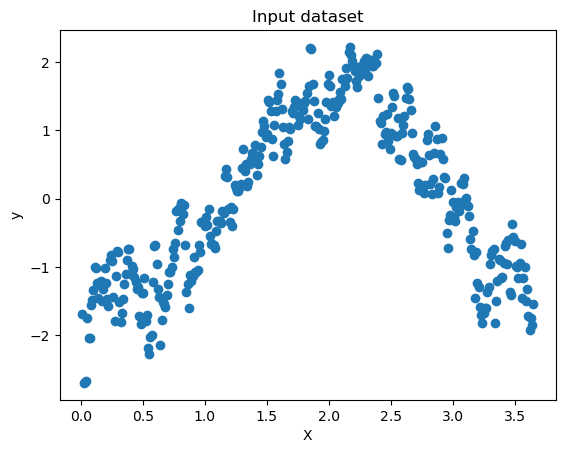

In [488]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['ROMA_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [489]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['ROMA_temp_mean'].min()

-2.6948597433936015

In [490]:
#what is the max temperature? 
dfyear['ROMA_temp_mean'].max()

2.221897539346413

In [491]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [492]:
compute_cost(X,y)

array([0.73172619])

In [493]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [494]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=500 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-1],[-1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.001 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 281 ms
Wall time: 277 ms


In [495]:
theta

array([[-0.50626697],
       [ 0.17943686]])

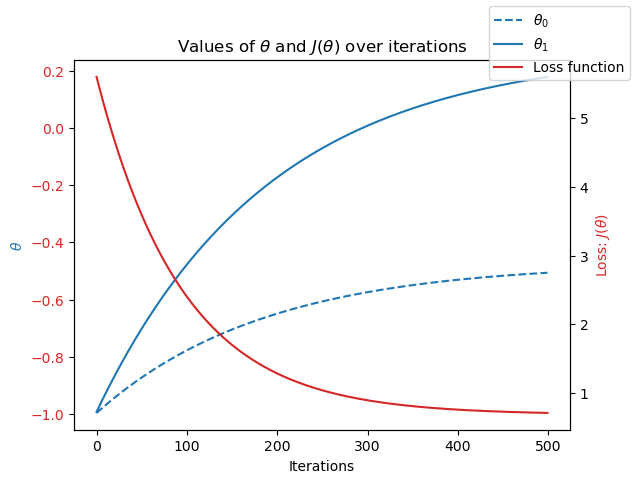

In [496]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [497]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.78 s
Wall time: 1.79 s


In [498]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [499]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [500]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=500 #<---start with the same iterations as above
theta_init=np.array([[0],[0]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [501]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

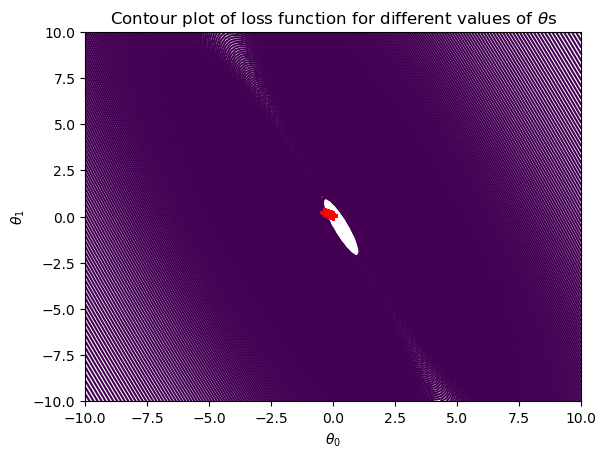

In [502]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()